In [15]:
import numpy as np
import seaborn as sns

In [28]:
def cost_of_r(r, power=1):
    R_0 = 2.5
    baseline = 1/(R_0 ** power)
    
    if r >= R_0:
        return 0
    else:
        return (1/(r**power) - baseline) * 1e10

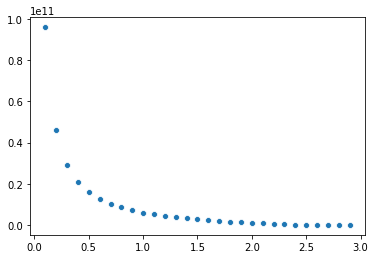

In [29]:
rs = np.arange(0.1, 3.0, 0.1)
costs_of_r = [cost_of_r(r) for r in rs]
sns.scatterplot(x=rs, y=costs_of_r)

In [24]:
def cost_of_n(n, slope1=50000, slope2=500000, capacity=20000):
    if n <= 0:
        return 0
    elif n <= capacity:
        return n * slope1
    else:
        return capacity * slope1 + (n - capacity) * slope2

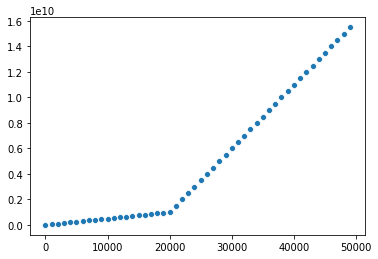

In [25]:
ns = np.arange(0, 50000, 1000)
costs_of_n = [cost_of_n(n) for n in ns]
sns.scatterplot(x=ns, y=costs_of_n)

In [71]:
np.random.default_rng().poisson(lam=100)

107

In [76]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

In [78]:
def step(state, action):
    # state: number of current cases (discretized)
    # action: value of R_effective to set (discretized)
    # return: new_state, reward
    
    expected_new_cases = state * action
    new_state = np.random.default_rng().poisson(lam=expected_new_cases)
    reward = -cost_of_n(new_state) - cost_of_r(action)
    
    new_state = find_nearest(ns, new_state)  # discretized case count
    
    return new_state, reward

In [79]:
step(10000, 2.5)

(25000, -3309000000)

In [80]:
step(10000, 2.0)

(20000, -2159000000.0)

In [81]:
step(10000, 1.0)

(10000, -6488100000.0)